<b>Web Analytics DATA 620 - Project 01</b>

<b>Assignment: “Centrality Measures”</b>

<b>Group - Chris Bloome / Mustafa Telab / Vinayak Kamath</b>

<b>Date - 20th June 2021</b>

--- 

For your first project, you are asked to

Identify and load a network dataset that has some categorical information available for each node.
For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
Compare your centrality measures across your categorical groups.


---

<b>Bike Share Systems (BSS) collection - Citi Bike Trip Histories - New York City</b>



Experience NYC in a whole new way - Citi Bike is the nation's largest bike share program, with 20,000 bikes and over 1,300 stations across Manhattan, Brooklyn, Queens, the Bronx and Jersey City. It was designed for quick trips with convenience in mind, and it’s a fun and affordable way to get around town.

The source of the data is citibikenyc.com; The csv file <b>data</b> includes:

 - Trip Duration (seconds)
 - Start Time and Date
 - Stop Time and Date
 - Start Station Name
 - End Station Name
 - Station ID
 - Station Lat/Long
 - Bike ID
 - User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
 - Gender (Zero=unknown; 1=male; 2=female)
 - Year of Birth

For our analysis here we are using data of April 2021 month.


<table  style="float:left">
    <tr><th>Name</th><th>Date Modified</th><th>Size</th><th>Type</th></tr>
    <tr><td>202104-citibike-tripdata.csv.zip</td><td>May 7th 2021, 10:56:18 am</td><td>89.92 MB</td><td>ZIP file (csv)</td></tr>
</table>


<b>Analysis Plan</b>
1. We will load the csv data into a temp object and then pull the distinct nodes and its characteristics and the linkages between the nodes.
  - The Nodes represent the User, the bikes,  and the Stations. The User node having characterisitics of Type, Gender, and Year of birth and the Station node having the characteristics of  latitude and logitude. The Bike node has no characteristics other then a unique Id.
  - The linkages represet the trips between start station and stop station.

2. Degree centrality is defined as the Number of incoming links to a node. We can check the station having the maximum number of trips to it and we can further to see if the same station has the maximum degree centrality for each gender type and/or user types. 


---

In [1]:
# Import required libraries
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib.pyplot import figure
from networkx_query import search_nodes, search_edges

from pyvis.network import Network

from tabulate import tabulate

from itertools import count

We will firsrt load the data CSV data file into a panda dataframe.

In [2]:
# loading csv file 
df = pd.read_csv('201306-citibike-tripdata-small.csv')

# Droping NAN value rows
df = df.replace('',np.nan)
df = df.dropna(axis="rows", how="any")

# Cleaning up the data for the column `gender` to convert the categorical values Zero=unknown; 1=male; 2=female;
df['gender'].replace(to_replace=[0, 1, 2], value=['unknown', 'male', 'female'], inplace=True)

In [3]:
# Viewing the data
df

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,695,6/1/2013 0:00,6/1/2013 0:11,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,male
1,693,6/1/2013 0:00,6/1/2013 0:11,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,male
3,123,6/1/2013 0:01,6/1/2013 0:03,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,male
4,1521,6/1/2013 0:01,6/1/2013 0:26,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,male
6,2057,6/1/2013 0:02,6/1/2013 0:36,285,Broadway & E 14 St,40.734546,-73.990741,532.0,S 5 Pl & S 5 St,40.710451,-73.960876,15693,Subscriber,1991.0,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127577,2812,6/11/2013 17:47,6/11/2013 18:34,448,W 37 St & 10 Ave,40.756604,-73.997901,502.0,Henry St & Grand St,40.714215,-73.981346,19361,Subscriber,1963.0,male
127578,294,6/11/2013 17:48,6/11/2013 17:53,251,Mott St & Prince St,40.723180,-73.994800,128.0,MacDougal St & Prince St,40.727103,-74.002971,17886,Subscriber,1962.0,male
127579,407,6/11/2013 17:47,6/11/2013 17:54,496,E 16 St & 5 Ave,40.737262,-73.992390,369.0,Washington Pl & 6 Ave,40.732241,-74.000264,16968,Subscriber,1987.0,male
127580,525,6/11/2013 17:39,6/11/2013 17:47,318,E 43 St & Vanderbilt Ave,40.753202,-73.977987,472.0,E 32 St & Park Ave,40.745712,-73.981948,19928,Subscriber,1959.0,male


In [4]:
# Creating the networkx graph object
G = nx.from_pandas_edgelist(df, source='start_station_name', target ='end_station_name'
                            , edge_attr=['tripduration','bikeid','usertype','birth_year','gender']
                            , create_using=nx.DiGraph(directed=True))

In [5]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 335
Number of edges: 31494
Average in degree:  94.0119
Average out degree:  94.0119


In [6]:
# A good metric to begin with is network density. This is simply the ratio of actual edges in the network to 
# all possible edges in the network.
density = nx.density(G)
print("Network density :", density)

Network density : 0.28147287514523195


Minimum degree : 1
Maximum degree : 434


{'whiskers': [<matplotlib.lines.Line2D at 0x15c2b118>,
 'caps': [<matplotlib.lines.Line2D at 0x15c2b478>,
 'boxes': [<matplotlib.lines.Line2D at 0x15c16f28>],
 'medians': [<matplotlib.lines.Line2D at 0x15c2b7d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x15c2b988>],
 'means': []}

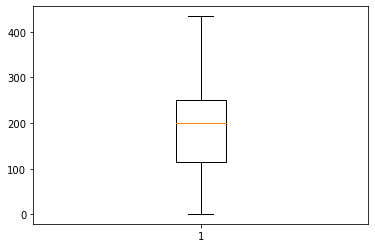

In [7]:
# compute  degree metric to find the core of the network:
deg=nx.degree(G) 
deg_min = min(dict(deg).values())
deg_max = max(dict(deg).values()) 
print("Minimum degree :", deg_min)
print("Maximum degree :", deg_max)

my_degrees = G.degree();
degree_values = dict(my_degrees).values()
fig = plt.figure();
plt.boxplot(degree_values)

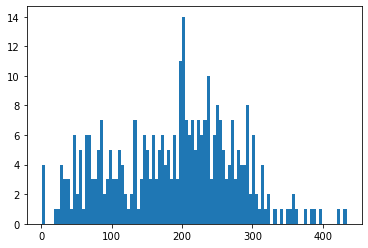

In [8]:
# display the histogram of node degrees in 100 bins:
h=plt.hist(dict(my_degrees).values(),100) 

In [9]:
# Another check we can do is to see if our Graph has more than one component:
print(nx.is_connected(G.to_undirected()))

False


Next, we’ll materialize the graph we created with the help of pyvis.network for formatting.

In [10]:
nt = Network(notebook=True)
nt.from_nx(G)
nt.show('nx.html')

---

<b>1. We will now analyze Degree centrality for our graph as defined as the Number of links to a node. We can check the station having the maximum number of trips to it by using the idegree method.</b>

In [11]:
leaderboard = {}
for x in G.nodes:
 leaderboard[x] = G.degree[x]
s = pd.Series(leaderboard, name='connections')
df2 = s.to_frame().sort_values('connections', ascending=False)

In [12]:
df2.head()

,connections
W 20 St & 11 Ave,434
E 17 St & Broadway,422
Broadway & E 14 St,399
8 Ave & W 31 St N,387
Broadway & W 24 St,383


Based on above we can see that "W 20 St & 11 Ave" has the max in connection or degree centrality for the month of April, 2021.

we can further check if this holds true for each gender type and/or user types

In [13]:
# we will create a funciton that will take the datframe, column name and search string as input and generate a graph
# to get us the in-connection stats:
def get_top_in_connection(df,  inp_column, inp_text):
    #dataframe having inp_text in column inp_column in dataset df
    df_search = df[df[inp_column]==inp_text]
    
    #creating the networkx graph object
    G_search = nx.from_pandas_edgelist(df_search, source='start_station_name', target ='end_station_name'
                            , edge_attr=['tripduration','bikeid','usertype','birth_year','gender']
                            , create_using=nx.DiGraph())
    
    leaderboard = {}
    for x in G_search.nodes:
        leaderboard[x] = G_search.degree[x]
    
    s = pd.Series(leaderboard, name='connections')
    df_search_return = s.to_frame().sort_values('connections', ascending=False)
    
    return df_search_return

In [14]:
#Checking for male gender dataset
df_check = get_top_in_connection(df,  'gender', 'male')
df_check.head()

# Does hold True for Male Gender Category of data

,connections
W 20 St & 11 Ave,390
E 17 St & Broadway,388
Broadway & E 14 St,357
Broadway & W 24 St,350
8 Ave & W 31 St N,348


In [15]:
#Checking for female gender dataset
df_check = get_top_in_connection(df,  'gender', 'female')
df_check.head()

# Does NOT hold True for Female Gender Category of data

,connections
E 17 St & Broadway,203
Broadway & E 14 St,190
W 20 St & 11 Ave,184
Broadway & W 24 St,158
Broadway & W 58 St,153


In [16]:
#Checking for unknown gender dataset
df_check = get_top_in_connection(df,  'gender', 'unknown')
df_check.head()

# Does NOT hold True for unknown Gender Category of data

,connections
Madison St & Clinton St,8
Pearl St & Hanover Square,7
South St & Gouverneur Ln,7
Canal St & Rutgers St,6
Pike St & E Broadway,6


We can see from above that the station "W 20 St & 11 Ave" has the max connection or degree centrality overall  and in male gender types; but for female and unknown it does NOT.

We can further check if this holds true for each user type as Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member

In [17]:
#Checking for Subscriber usertype dataset
df_check = get_top_in_connection(df,  'usertype', 'Subscriber')
df_check.head()

# Does hold True for Subscriber usertype Category of data

,connections
W 20 St & 11 Ave,434
E 17 St & Broadway,422
Broadway & E 14 St,399
8 Ave & W 31 St N,387
Broadway & W 24 St,383


We can see from above that the station "W 20 St & 11 Ave" has the max in connection or degree centrality for user type "Subscriber" too.

---

<b>2. Centrality Measures - degree_centrality(),  eigenvector_centrality(), betweenness_centrality(), and closeness_centrality()</b>

The <b>degree centrality</b> for a node v is the fraction of nodes it is connected to. We can use the function to check that "E 17 St & Broadway" is the node or station having max connections.

<b>Eigenvector centrality</b> (also called eigencentrality) is a measure of the influence of a node in a network. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes

<b>Betweenness Centrality</b> computes the shortest-path betweenness centrality for nodes.

<b>Closeness Centrality</b> is the reciprocal of the sum of the shortest path distances from the node to all other nodes. 

In [18]:
d=nx.degree_centrality(G )
dc_sorted_tuples = sorted(d.items(), key=lambda item: item[1], reverse=True)
dc_sorted_dict = {k: v for k, v in dc_sorted_tuples}
dc_sorted_dict

{'W 20 St & 11 Ave': 1.2994011976047906,
 'E 17 St & Broadway': 1.2634730538922156,
 'Broadway & E 14 St': 1.194610778443114,
 '8 Ave & W 31 St N': 1.158682634730539,
 'Broadway & W 24 St': 1.1467065868263473,
 'Broadway & E 22 St': 1.1287425149700598,
 'Lafayette St & E 8 St': 1.0808383233532934,
 '9 Ave & W 22 St': 1.068862275449102,
 'Carmine St & 6 Ave': 1.068862275449102,
 'Christopher St & Greenwich St': 1.0658682634730539,
 'West Thames St': 1.0508982035928145,
 'Broadway & W 58 St': 1.0269461077844313,
 'W 41 St & 8 Ave': 0.9970059880239521,
 'St Marks Pl & 2 Ave': 0.9670658682634731,
 'E 24 St & Park Ave S': 0.9670658682634731,
 'Cleveland Pl & Spring St': 0.9550898203592815,
 'Pershing Square North': 0.9491017964071857,
 'E 4 St & 2 Ave': 0.9461077844311377,
 'Pershing Square South': 0.9431137724550899,
 'Broadway & W 56 St': 0.940119760479042,
 'Barrow St & Hudson St': 0.9251497005988024,
 'W 33 St & 7 Ave': 0.9221556886227545,
 'W 21 St & 6 Ave': 0.9191616766467067,
 'E 11 

In [19]:
e=nx.eigenvector_centrality(G )
ec_sorted_tuples = sorted(e.items(), key=lambda item: item[1], reverse=True)
ec_sorted_dict = {k: v for k, v in ec_sorted_tuples}
ec_sorted_dict

{'W 20 St & 11 Ave': 0.11171396447426644,
 'E 17 St & Broadway': 0.1091268075378558,
 '8 Ave & W 31 St N': 0.10505974957788787,
 'Broadway & W 24 St': 0.10320052481551117,
 'Broadway & E 14 St': 0.10259106521166249,
 '9 Ave & W 22 St': 0.09905809606851311,
 'Broadway & E 22 St': 0.09811623193860357,
 'Carmine St & 6 Ave': 0.09524613011236545,
 'W 41 St & 8 Ave': 0.0933908506958129,
 'Christopher St & Greenwich St': 0.09284541133680073,
 'E 24 St & Park Ave S': 0.08935604635543429,
 'West Thames St': 0.08882737844737293,
 'Lafayette St & E 8 St': 0.08880036683696849,
 'St Marks Pl & 2 Ave': 0.08691889703301486,
 'Broadway & W 58 St': 0.08691584341450284,
 'Broadway & W 56 St': 0.08543476241267912,
 'E 11 St & 2 Ave': 0.0851169005115312,
 'W 33 St & 7 Ave': 0.08461797031794878,
 '9 Ave & W 14 St': 0.08410527181932707,
 'W 20 St & 7 Ave': 0.08360466991904034,
 'University Pl & E 14 St': 0.0829702037839427,
 'E 7 St & Avenue A': 0.08272721630220117,
 'Barrow St & Hudson St': 0.082695664382

In [20]:
b=nx.betweenness_centrality(G )
bc_sorted_tuples = sorted(b.items(), key=lambda item: item[1], reverse=True)
bc_sorted_dict = {k: v for k, v in bc_sorted_tuples}
bc_sorted_dict

{'W 20 St & 11 Ave': 0.010687074666681623,
 'E 17 St & Broadway': 0.009608940765923783,
 'Broadway & E 14 St': 0.009355878177163626,
 'Lawrence St & Willoughby St': 0.008254296397894533,
 'DeKalb Ave & Hudson Ave': 0.007956709090547564,
 'Carmine St & 6 Ave': 0.007947943327909813,
 '8 Ave & W 31 St N': 0.007551376663195479,
 '9 Ave & W 22 St': 0.007294613683178266,
 'St Marks Pl & 2 Ave': 0.007032140116052439,
 'Lafayette St & E 8 St': 0.006853091616408653,
 'Broadway & W 24 St': 0.006787908794410286,
 'Broadway & E 22 St': 0.006554037291919098,
 'Hicks St & Montague St': 0.006425628932998339,
 'Dean St & 4 Ave': 0.005956300688346356,
 'Christopher St & Greenwich St': 0.0058369032099581195,
 'Forsyth St & Canal St': 0.005794463301963734,
 'West Thames St': 0.005788217950227936,
 'Cadman Plaza West & Montague St': 0.005738713707743261,
 'Mercer St & Bleecker St S': 0.005649283882750803,
 'E 2 St & Avenue B': 0.005447385508701194,
 'State St & Smith St': 0.00539760120093607,
 'Cumberland

In [21]:
c=nx.closeness_centrality(G )
cc_sorted_tuples = sorted(c.items(), key=lambda item: item[1], reverse=True)
cc_sorted_dict = {k: v for k, v in cc_sorted_tuples}
cc_sorted_dict

{'W 20 St & 11 Ave': 0.742736004501065,
 'E 17 St & Broadway': 0.7280767412543334,
 '8 Ave & W 31 St N': 0.7124527768497341,
 'Broadway & W 24 St': 0.7048895838895457,
 'Broadway & E 14 St': 0.7048895838895457,
 '9 Ave & W 22 St': 0.6859565991982977,
 'Carmine St & 6 Ave': 0.6859565991982977,
 'Broadway & E 22 St': 0.684542255694796,
 'W 41 St & 8 Ave': 0.6761771772138006,
 'Christopher St & Greenwich St': 0.674802833357675,
 'Lafayette St & E 8 St': 0.6707131192161132,
 'West Thames St': 0.6680140724587043,
 'E 24 St & Park Ave S': 0.6626806267704113,
 'St Marks Pl & 2 Ave': 0.6535492008109764,
 'W 33 St & 7 Ave': 0.6509862627685805,
 'Broadway & W 56 St': 0.6509862627685805,
 'Broadway & W 58 St': 0.6497123170488769,
 'Cleveland Pl & Spring St': 0.6497123170488769,
 'E 11 St & 2 Ave': 0.6484433476796407,
 'University Pl & E 14 St': 0.645920221813183,
 'Pershing Square South': 0.645920221813183,
 'Barrow St & Hudson St': 0.645920221813183,
 'E 7 St & Avenue A': 0.6446660077902447,
 'P

degree_centrality      ==>   'W 20 St & 11 Ave': 1.2994011976047906

eigenvector_centrality ==>   'W 20 St & 11 Ave': 0.11171396447426644

betweenness_centrality ==>   'W 20 St & 11 Ave': 0.010687074666681623

closeness_centrality   ==>   'W 20 St & 11 Ave': 0.742736004501065

Per above, the station "W 20 St & 11 Ave" has the highest degree centrality and eligenvector centrality

In [22]:
## We will now make a list of the stations for 4 centrality metrics 

names1= {}
names2= {}
names3= {}
names4= {}

for key, value in dc_sorted_dict.items():
    names1[key]= value

for key, value in ec_sorted_dict.items():
    names2[key]= value

for key, value in bc_sorted_dict.items():
    names3[key]= value

for key, value in cc_sorted_dict.items():
    names4[key]= value
    
## use Python sets to compute a union of the sets 
#names=list(set(names1) | set(names2)| set(names3)| set(names4)  )
## use the networksx vorterrank function to get a sorted list of nodes based on its influence ranking:
names =nx.voterank(G)

## build a table with centralities 
table=[[name,d[name],e[name],b[name],c[name] ] for name in names]

print (tabulate(table, headers= ["Station", "Degree", "Eigenvector"
                                 , "Betweeness", "Closeness"])) 

Station                                Degree    Eigenvector    Betweeness    Closeness
---------------------------------  ----------  -------------  ------------  -----------
W 20 St & 11 Ave                   1.2994        0.111714      0.0106871       0.742736
E 17 St & Broadway                 1.26347       0.109127      0.00960894      0.728077
Broadway & E 14 St                 1.19461       0.102591      0.00935588      0.70489
Broadway & E 22 St                 1.12874       0.0981162     0.00655404      0.684542
Lafayette St & E 8 St              1.08084       0.0888004     0.00685309      0.670713
Broadway & W 24 St                 1.14671       0.103201      0.00678791      0.70489
8 Ave & W 31 St N                  1.15868       0.10506       0.00755138      0.712453
Broadway & W 58 St                 1.02695       0.0869158     0.00466332      0.649712
West Thames St                     1.0509        0.0888274     0.00578822      0.668014
Christopher St & Greenwich St     

p.s.: Another Centrality measure we can check to coinfirm above is using VoteRank; which gives a list of influential nodes in a graph using VoteRank algorithm using the function - nx.voterank(Graph)

Based on this we can see that 'W 20 St & 11 Ave' and 'E 17 St & Broadway' are the top two influential nodes.

We will now find the above centrality metrics for the categorical atrributes:

In [23]:
# We will create a function that will take the dataframe as input and the filter params and create the graph and calcualte the 
# centrality metrics and display as output

def get_centrality(df,  inp_column, inp_text):
    #dataframe having inp_text in column inp_column in dataset df
    df_search = df[df[inp_column]==inp_text]
    
    #creating the networkx graph object
    G_search = nx.from_pandas_edgelist(df_search, source='start_station_name', target ='end_station_name'
                            , edge_attr=['tripduration','bikeid','usertype','birth_year','gender']
                            , create_using=nx.DiGraph()) 
    
    d=nx.degree_centrality(G_search)
    dc_sorted_tuples = sorted(d.items(), key=lambda item: item[1], reverse=True)
    dc_sorted_dict = {k: v for k, v in dc_sorted_tuples}
    
    e=nx.eigenvector_centrality(G_search)
    ec_sorted_tuples = sorted(e.items(), key=lambda item: item[1], reverse=True)
    ec_sorted_dict = {k: v for k, v in ec_sorted_tuples}
    
    b=nx.betweenness_centrality(G_search )
    bc_sorted_tuples = sorted(b.items(), key=lambda item: item[1], reverse=True)
    bc_sorted_dict = {k: v for k, v in bc_sorted_tuples}
    
    c=nx.closeness_centrality(G_search )
    cc_sorted_tuples = sorted(c.items(), key=lambda item: item[1], reverse=True)
    cc_sorted_dict = {k: v for k, v in cc_sorted_tuples}

    ## We will now make a list of the stations for 4 centrality metrics 

    names1= {}
    names2= {}
    names3= {}
    names4= {}

    for key, value in dc_sorted_dict.items():
        names1[key]= value

    for key, value in ec_sorted_dict.items():
        names2[key]= value

    for key, value in bc_sorted_dict.items():
        names3[key]= value

    for key, value in cc_sorted_dict.items():
        names4[key]= value

    ## use Python sets to compute a union of the sets 
    #names=list(set(names1) | set(names2)| set(names3)| set(names4)  )
    ## use the networksx vorterrank function to get a sorted list of nodes based on its influence ranking:
    names =nx.voterank(G_search)

    ## build a table with centralities 
    table=[[name,d[name],e[name],b[name],c[name] ] for name in names]

    print (tabulate(table, headers= ["Station", "Degree", "Eigenvector"
                                     , "Betweeness", "Closeness"])) 
    

In [24]:
#Checking for male gender dataset
get_centrality(df,  'gender', 'male')

Station                             Degree    Eigenvector    Betweeness    Closeness
-------------------------------  ---------  -------------  ------------  -----------
W 20 St & 11 Ave                 1.17117       0.113544     0.0122577       0.707006
E 17 St & Broadway               1.16517       0.117432     0.0110702       0.707006
Broadway & E 14 St               1.07207       0.10634      0.00987407      0.672727
Broadway & W 24 St               1.05105       0.107803     0.00813837      0.678208
Broadway & E 22 St               0.996997      0.101377     0.00663377      0.656805
Lafayette St & E 8 St            0.993994      0.0953521    0.00843801      0.658103
Christopher St & Greenwich St    0.954955      0.0940977    0.00558775      0.644101
Broadway & W 58 St               0.93994       0.0915548    0.00545952      0.636711
8 Ave & W 31 St N                1.04505       0.109868     0.00799365      0.685185
9 Ave & W 22 St                  0.957958      0.100681     0.007

In [25]:
#Checking for female gender dataset
get_centrality(df,  'gender', 'female')

Station                               Degree    Eigenvector    Betweeness    Closeness
---------------------------------  ---------  -------------  ------------  -----------
E 17 St & Broadway                 0.615152     0.169431      0.0251644       0.587819
Broadway & E 14 St                 0.575758     0.150987      0.0248662       0.571434
W 20 St & 11 Ave                   0.557576     0.145309      0.0236768       0.561649
Broadway & W 58 St                 0.463636     0.112303      0.0128349       0.529892
Cleveland Pl & Spring St           0.442424     0.110408      0.0129207       0.538593
West Thames St                     0.40303      0.0859638     0.0139147       0.522298
Broadway & E 22 St                 0.463636     0.121562      0.0178506       0.547584
Lafayette St & E 8 St              0.4          0.0919271     0.0115773       0.525646
Broadway & W 24 St                 0.478788     0.147494      0.0141698       0.558779
W 21 St & 6 Ave                    0.372727

In [26]:
#Checking for Subscriber usertype dataset
get_centrality(df,  'usertype', 'Subscriber')

Station                                Degree    Eigenvector    Betweeness    Closeness
---------------------------------  ----------  -------------  ------------  -----------
W 20 St & 11 Ave                   1.2994        0.111714      0.0106871       0.742736
E 17 St & Broadway                 1.26347       0.109127      0.00960894      0.728077
Broadway & E 14 St                 1.19461       0.102591      0.00935588      0.70489
Broadway & E 22 St                 1.12874       0.0981162     0.00655404      0.684542
Lafayette St & E 8 St              1.08084       0.0888004     0.00685309      0.670713
Broadway & W 24 St                 1.14671       0.103201      0.00678791      0.70489
8 Ave & W 31 St N                  1.15868       0.10506       0.00755138      0.712453
Broadway & W 58 St                 1.02695       0.0869158     0.00466332      0.649712
West Thames St                     1.0509        0.0888274     0.00578822      0.668014
Christopher St & Greenwich St     

We can see from above that the station "W 20 St & 11 Ave" has the max connection or degree centrality overall  and in male gender types; but for female it does NOT.

We can see from above that the station "W 20 St & 11 Ave" has the max in connection or degree centrality for user type "Subscriber" too.

---

<b>Some Additional analysis on the graph generated:</b>

<b>a. Drawing the graph for the Bike with bike-id "15484"</b>

In [27]:
#dataframe having 'E 17 St & Broadway' end_station_name dataset
df_location = df[   df['bikeid'] == 15484 ]
df_location = df_location[["start_station_name", "end_station_name","gender"]]
df_location = df_location.drop_duplicates()

#creating the networkx graph object
G_location = nx.from_pandas_edgelist(df_location, source='start_station_name', target ='end_station_name'
                                     , edge_attr=['gender']
                                     , create_using=nx.DiGraph()
                                    )

In [28]:
df_location

,start_station_name,end_station_name,gender
1859,5 Ave & E 29 St,Broadway & E 22 St,male
2090,Broadway & E 22 St,W 43 St & 10 Ave,male
4880,W 43 St & 10 Ave,W 39 St & 9 Ave,male
10490,W 13 St & 6 Ave,8 Ave & W 31 St N,male
10632,8 Ave & W 31 St N,W 13 St & 6 Ave,male
13447,Cleveland Pl & Spring St,Forsyth St & Broome St,male
14823,E 53 St & Lexington Ave,W 43 St & 10 Ave,male
16738,W 4 St & 7 Ave S,DeKalb Ave & Hudson Ave,male
24918,Suffolk St & Stanton St,E 10 St & Avenue A,female
24951,E 10 St & Avenue A,Lafayette St & E 8 St,male


In [29]:
print(nx.info(G_location))

Name: 
Type: DiGraph
Number of nodes: 35
Number of edges: 26
Average in degree:   0.7429
Average out degree:   0.7429


In [30]:
# And I need to transform my categorical column in a numerical value typeA->1, typeB->2...
df_location['gender']=pd.Categorical(df_location['gender'])

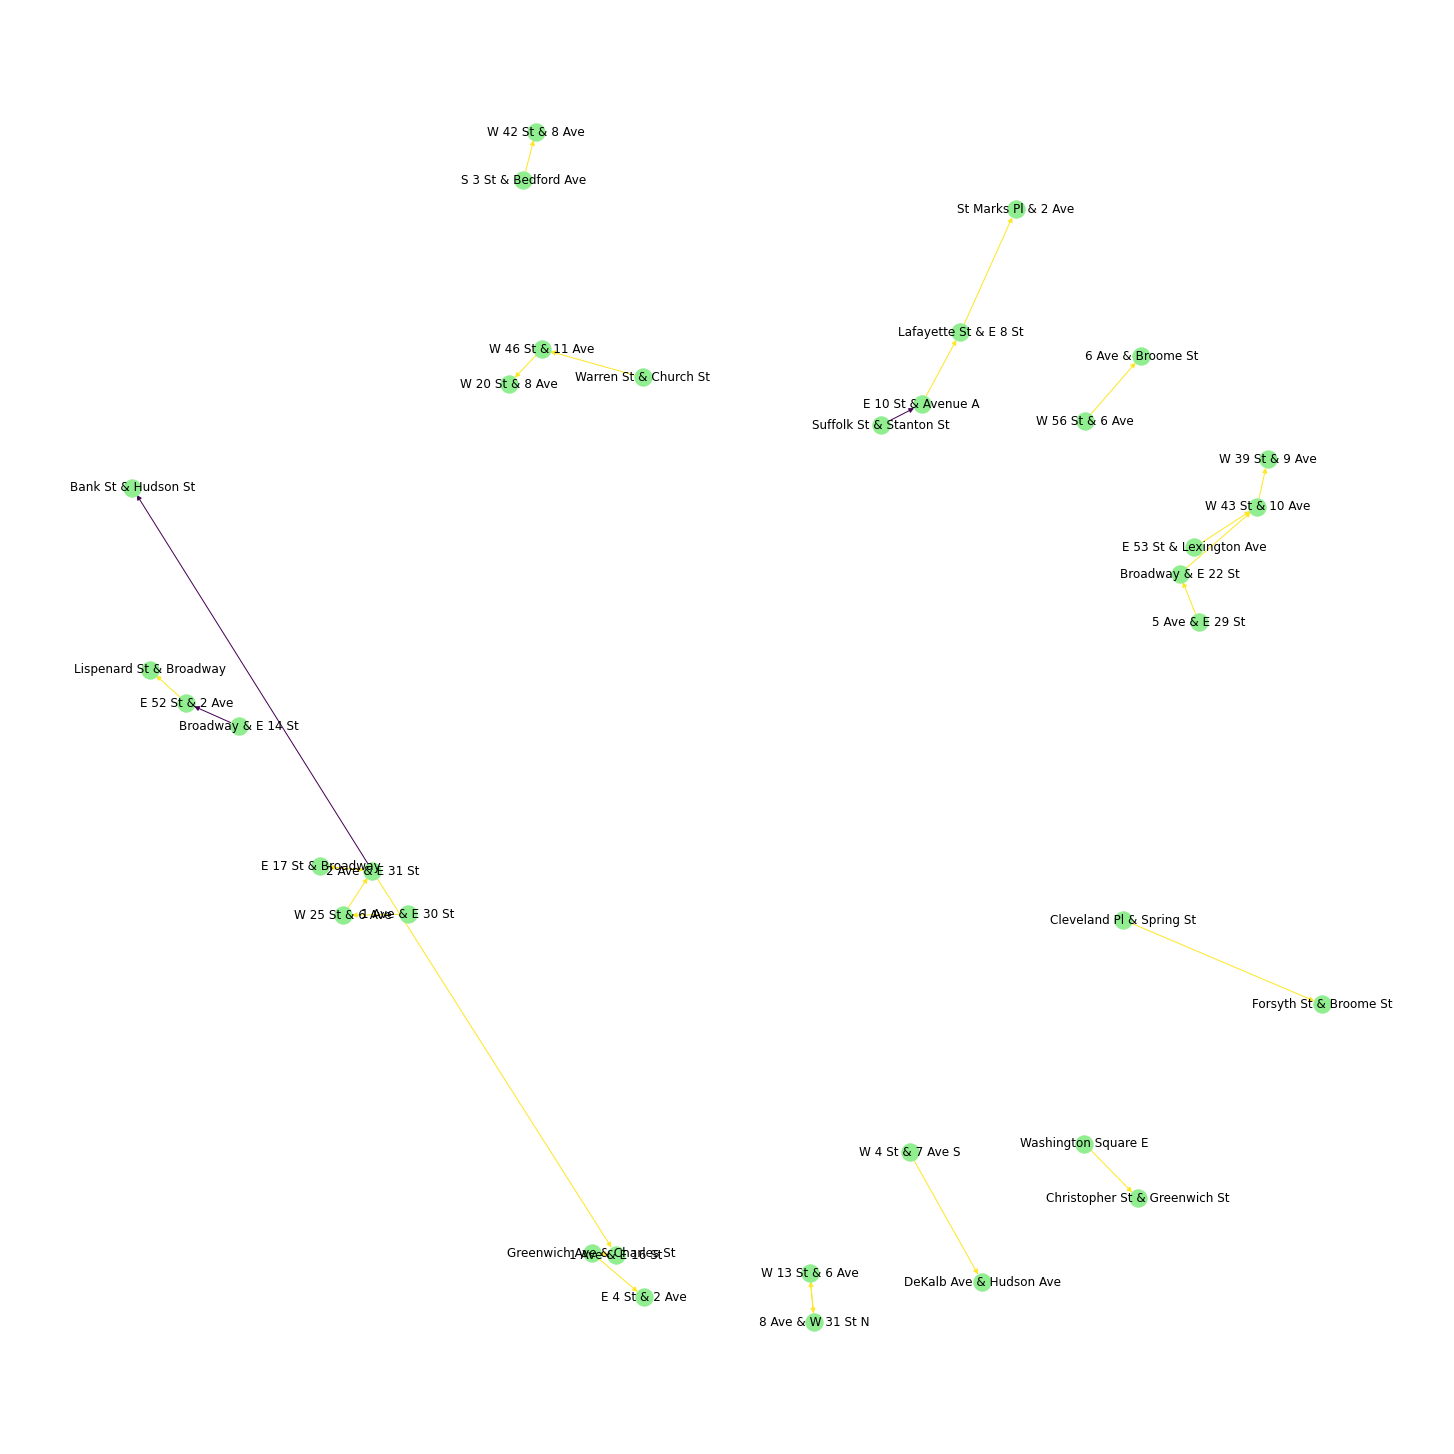

In [31]:
plt.figure(figsize=(20, 20))
nx.draw(G_location, with_labels=True,node_color='lightgreen', edge_color=df_location['gender'].cat.codes)


We know that the bikes are taken for servicing and then placed back at the station; its not always the same station. 

The above graph helps confirms this.

---

<b>b. Getting the Path between 2 Stations based on People trip between these stations</b>

In [32]:
# We can quickly check to see how to get the path (shortest may not be right here as we dont have distance and only duration)
# between two stations. 
p_path = nx.shortest_path(G, source="West Thames St", target="Macon St & Nostrand Ave")

print("Shortest path between 'West Thames St' and 'Macon St & Nostrand Ave':", p_path)
print("Length of that path:", len(p_path)-1)

Shortest path between 'West Thames St' and 'Macon St & Nostrand Ave': ['West Thames St', 'Lefferts Pl & Franklin Ave', 'Macon St & Nostrand Ave']
Length of that path: 2


---

<b>Video Presentation Link: </b> 

[Youtube Link](https://www.youtube.com/watch?v=EFQ-TF-eJM4)

<b>Citation: </b> 

This data is provided according to the NYCBS Data Use Policy. and details can be found on  https://www.citibikenyc.com/system-data

<b>Additional Resources: </b> 

- The City of New York's bicycling data (http://www.nyc.gov/html/dot/html/about/datafeeds.shtml#Bikes)
- The City of New York's bicycling trip data dumps (https://s3.amazonaws.com/tripdata/index.html)
- In Social Network Analysis,  Degree centrality is a simple count of the total number of connections linked to a vertex. It can be thought of as a kind of popularity measure, but a crude one that does not recognize a difference between quantity and quality. Degree centrality does not differentiate between a link to the president of the United States and a link to a high school dropout. Degree is the measure of the total number of edges connected to a particular vertex. For directed networks, there are two measures of degree. In-degree is the number of connections that point inward at a vertex. Out-degree is the number of connections that originate at a vertex and point outward to other vertices.
- Degree centrality is one of the easiest to calculate. The degree centrality of a node is simply its degree—the number of edges it has.The higher the degree, the more central the node is. This can be an effective measure, since many nodes with high degrees also have high centrality by other measures.


---